In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)
print(keras.__version__)
print(np.__version__)


1.10.0
2.1.6-tf
1.15.1


In [6]:
#loading data

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

In [8]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/home/anish/anaconda3/lib/python3.6/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [9]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [10]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_labels.shape

(60000,)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
test_labels.shape

(10000,)

In [16]:
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

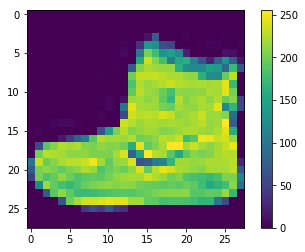

In [17]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [18]:
#preprocessing data

In [19]:
train_images = train_images/255.0

In [20]:
test_images = test_images/255

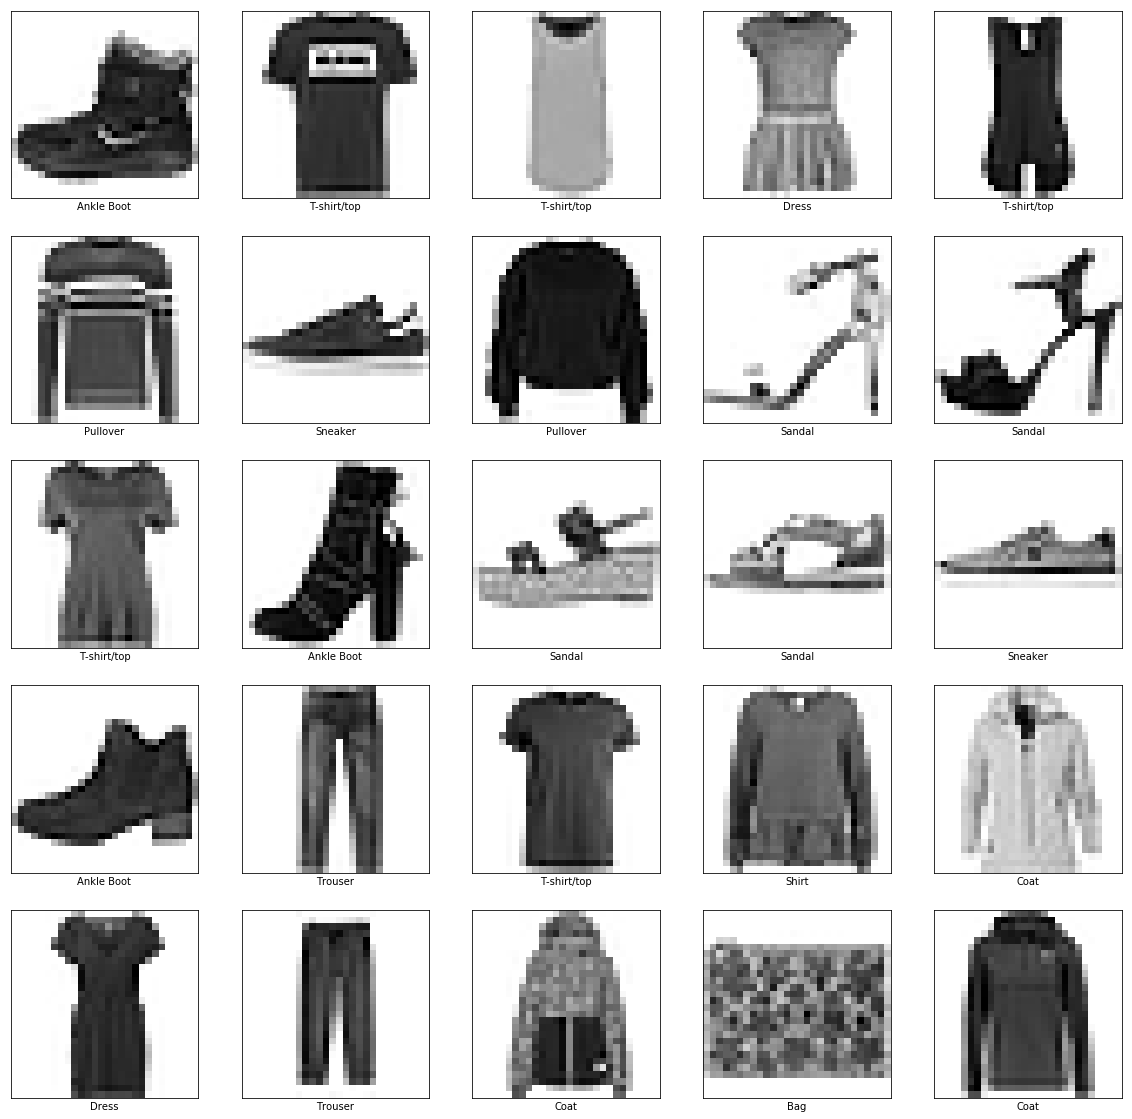

In [21]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [22]:
#building the model

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [24]:
#compile the model

In [25]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2787 - acc: 0.8974
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2655 - acc: 0.9020
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2572 - acc: 0.9038
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2465 - acc: 0.9087
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2367 - acc: 0.9120


In [28]:
#evaluate  the test dataset

In [29]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 24us/step


In [30]:
test_loss

0.32852904238700864

In [31]:
test_acc

0.8863

In [32]:
#making predictions

In [33]:
predictions=model.predict(test_images)

In [34]:
np.argmax(predictions[0])

9

In [35]:
test_labels[0]

9

In [36]:
#Plot the correct predictions in blue,incorrect predictions in red

In [46]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:0.2f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
         predictions_array,true_label=predictions_array[i],true_label[i]
         plt.grid(False)
         plt.xticks([])
         plt.yticks([])
         thisplot = plt.bar(range(10),predictions_array,color="#777777")
         plt.ylim([0,1])
         predicted_label=np.argmax(predictions_array)
         thisplot[predicted_label].set_color('red')
         thisplot[true_label].set_color('blue')
         
         
         

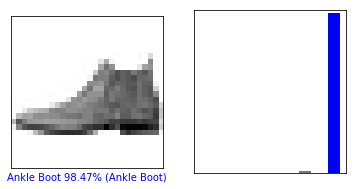

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,test_labels)

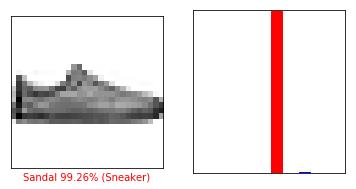

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,test_labels)

In [49]:
#plotting the first X test images, thier predicted label,and true label
#color correct predictions in blue ,incorrect predictions in red


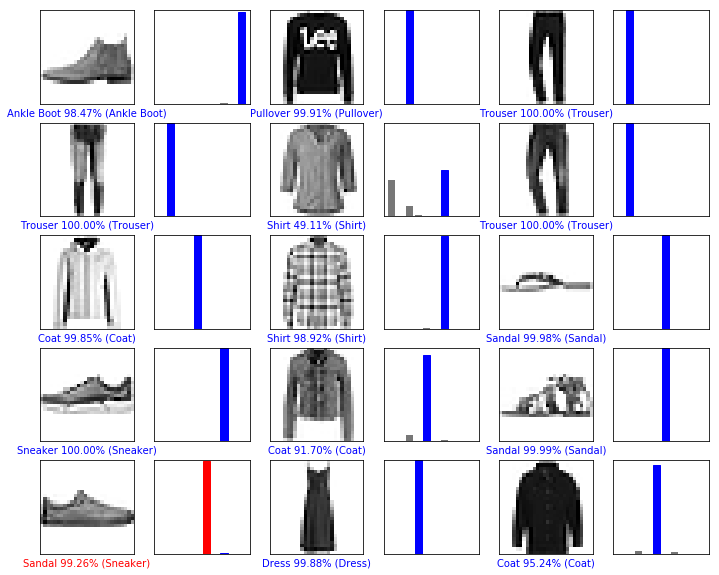

In [52]:
rows = 5
cols = 3
num_images = rows*cols
plt.figure(figsize=(2*2*cols,2*rows))
for i in range(num_images):
    plt.subplot(rows,2*cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(rows,2*cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
    
    